### Question 1:  
A generational GA has a population size of 100 individuals; uses fitness proportional
selection without elitisms; and after $t$ generation has a mean population fitness of 76.
There is one copy of the current best member, which has fitness 157.

(a)  What is the expectation for the number of copies of the best individual in the mating pool?    
**Solution:**   
<div style="padding: 20px;"> 
Sum of the fitness of all chromosomes will be  7600.  
Expectation of number of copies is given by the probability for the number of individual. In this case, Using roulette wheel selection gives chance of
<p style="text-align: center;"> $p = \frac{157}{76*100} ≈ 0.0207$ </p>
of the best copy being selected per time.  
Therefore for the mating pool the expected number of copies of the best individual is 
    <p style="text-align: center;"> $100 * p ≈ 2.07$ </p>
</div>
(b)  What is the probability that there will be no copies of the best individual in the mating pool?        
**Solution:**   
<div style="padding: 20px;"> 
The probability sum always to $1$. Therefore the probability of no best individual is;
<p style="text-align: center;"> $q = 1 − \frac{157}{76*100} ≈ 0.9793$  </p>
The probability of no copies of the best individual in the mating pool is the probability that all of the 100 individuals in the mating pool are different from the best. The probability that a different individual than the best is selected 100 times.
    <p style="text-align: center;"> $q^{100} ≈ 0.123$ </p>
</div>

###  Question 2:  
Given the fitness function f(x) = x^2, calculate the probability of selecting the individuals x = 3, x = 5, and x = 7, using roulette wheel selection. Calculate the probability of selecting the same individuals when the fitness function is f1(x) = f(x)+8. Which fitness function yields a lower selection pressure?

**Solution:** 


| x\Function | f           | f1 |
|:---|-------------|----------------|
| 3          |  $x^2$ = 9  | $x^2$ + 8 = 17 |
| 5          |  $x^2$ = 25 | $x^2$ + 8 = 33 | 
| 5          |  $x^2$ = 25 | $x^2$ + 8 = 33 | 
| 7          |  $x^2$ = 49 | $x^2$ + 8 = 57 | 
| **sum**    | **83**      | **107**        | 

For the roulette wheel, we take the sum of the fitness of each individual. 
Given $f(x)=x^2$
A=3 is chosen, B=5 is chosen, C=7 is chosen.  
$\sum f=9+25+49=83$  

Therefore, 
- for x = 3 probability is $P(A)=9/83 ≈ 0.1$ 
- for x = 5 probability is $P(B)=25/83 ≈ 0.31$
- for x = 7 probability is $P(C)=49/83 ≈ 0.59$

Given $f_1(x)=f(x)+8$, A= 3 is chosen, B=5 is chosen, C=7 is chosen. $\sum f_1=17+33+57=107$  

Therefore,
- for x = 3 probability is $P(A)=17/107=0.16$ 
- for x = 5 probability is $P(B)=33/107=0.31$
- for x = 7 probability is $P(C)=57/107=0.53$

Thus, with the fitness function $f_1(x)=x^2+8$ there is a lower selection pressure as the probability to be selected is higher for lower number (in this case x=3)


###  Question 3:  
 The Counting Ones problem amounts to find a bit string whose sum of its entries is maximum. This easy problem is used to illustrate the difference between Monte-Carlo search and a simple genetic algorithm.  
Implement a Monte-Carlo search algorithm for the Counting Ones problem.  

##### (a) Use n = 100 and for a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.

**Solution:** 


In [120]:
#Import necessary libraries
import math
import sys
import random
from collections import deque
import numpy as np
import matplotlib.pyplot as plt

In [121]:
# defining parameters
n = 100
iterations = 1500

def counting_ones(sequence):
    return sum(sequence)
    
def generate_random_bit_sequence(n):
    # creating a bit sequence with length n
    sequence = np.random.randint(2, size=n) 
    return sequence

def MonteCarloSearch(obj_func, n, iteration):
    """Monte-Carlo search for binary problems works as follows.
    (a) Start with a random bit sequence.
    (b) If it is equal to the goal sequence then stop, otherwise repeat the process from step (a)."""
    best_fitnesses=[]
    best = ''
    for i in range(0,iteration):
        bitsequence = ''
        bitsequence = generate_random_bit_sequence(n)
        if obj_func(bitsequence) > obj_func(best):
            #if count of 1's is more than the old ones, assign the bitsequence as best
            best = bitsequence
        best_fitnesses.append(obj_func(best))
        if (obj_func(bitsequence) == n):
            print (result)
            print("Success!! Best fitness",best_fitness," found in individual number ",i )
            break;
    print ("Best solution found by MonteCarloSearch: ", best)
    print ("Best fitness: ", obj_func(best))
    return best_fitnesses

In [122]:
best_fitnesses = MonteCarloSearch(counting_ones, n, iterations)

Best solution found by MonteCarloSearch:  [1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0]
Best fitness:  66


#### Ploting the best fittness

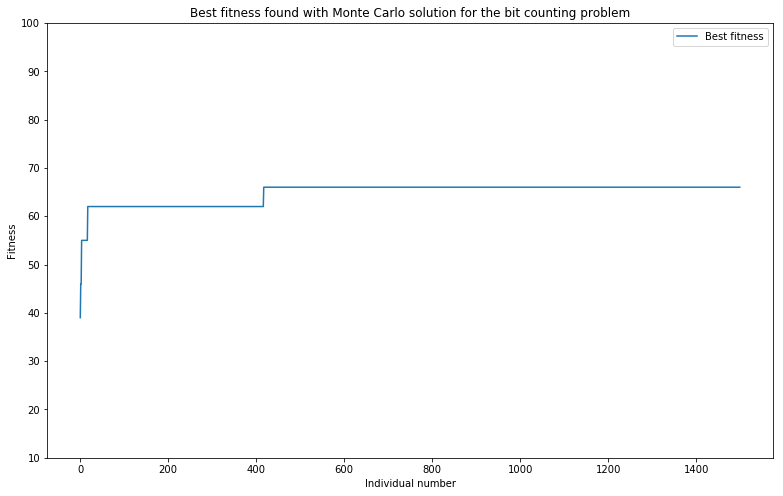

In [123]:
plt.figure(1,figsize=(13,8))
plt.plot(best_fitnesses,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with Monte Carlo solution for the bit counting problem")
plt.ylim(10, 100)
plt.legend()
plt.show()

The result depends on whether you consider the result of every iteration a ‘found individual’, or only consider the last individual as a ‘found individual’. Based on how the question was phrased we assumed the first case was meant. Otherwise, the result would just be completely random.

##### (b) Now do ten runs. How many times the algorithm finds the optimum?  

**Solution:** 


Best solution found by MonteCarloSearch:  [1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1]
Best fitness:  66
Best solution found by MonteCarloSearch:  [0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1]
Best fitness:  68
Best solution found by MonteCarloSearch:  [1 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1]
Best fitness:  67
Best solution found by MonteCarloSearch:  [0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1
 1 1 1 0 1 1 0 0

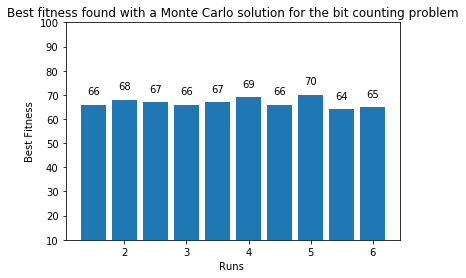

In [124]:
plt.figure(1,figsize=(13,8))
fig, ax = plt.subplots()
plt.xlabel("Runs ")
plt.ylabel("Best Fitness")
plt.title("Best fitness found with a Monte Carlo solution for the bit counting problem")
runs = range(1, 11)
performance = []
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

for i in range (1,11):
    to_plot=MonteCarloSearch(counting_ones, 100, 1500)
    performance.append(max(to_plot))
rects1 = ax.bar(runs, performance , align='center')
ax.set_xticklabels(runs)
plt.ylim(10, 100)
autolabel(rects1)
plt.show()

As we see, even with 10 runs the algorithm does not find an optimal solution
Zero times, since the probability of finding the optimum is 1/(2^n) = 1/(2^100) = +- 7.8 * 10^-31, but we only do 1500 iterations per run, so 15000 in total. Taking into account the 15000 iterations, the chance of finding the optimum is 15000/(2^100) = +- 1.18 * 10^-26  

###  Question 4:  

Implement a simple (1 + 1)-GA for solving the Counting Ones problem, using the same approach as with the Monte-Carlo search algorithm.

##### (a) Use n = 100 and a mutation rate p = 1/n. For a run of 1500 iterations, plot the best fitness against the elapsed number of iterations.
**Solution:**

Now we try to solve the same problem with a simple genetic algorithm


In [125]:
''.join([str(random.randint(0,1)) for z in range(1,n+1)])

'0000111111001011011011110110001000110010010111101000000001001011011011010110110101001010101100000010'

In [127]:
#Import necessary libraries
import math
import sys
import random
from collections import deque

# defining parameters
n = 100
iterations = 1500
p = 1/n

In [128]:
def GeneticAlgorithm(obj_func, n, iteration):
    """A simple (1 + 1)-GA for binary problems works as follows. 1
    (a) Randomly generate a bit sequence x.
    (b) Create a copy of x and invert each of its bits with probability p. Let xm be the result.
    (c) If xm is closer to the goal sequence than x then replace x with xm.
    (d) Repeat the process from step (b) with the new x until the goal sequence is reached."""
    #create a random parent of n bits
    parent = generate_random_bit_sequence(n) 
    #compute the probability of mutation in percentage (integer between 0 and 100)
    mutation_probability=((1/n)*100) 
    best_fitness_list=[]
    for i in range(0,iteration):
        bit_position = 0
        parent_copy = list(parent) #make a copy of the parent
        fitness_parent = obj_func(parent) #compute parent fitness
        best_fitness_list.append(fitness_parent) #save fitness
        for bit in parent_copy:
            ##compute the probability of mutation in percentage (integer between 0 and 100)
            x=random.uniform(0,100) 
            if  x <= mutation_probability: # if the just created random number is less than the mutation probbility
                #mutates 0 in a and 1 in 0
                if bit == 1: 
                    parent_copy[bit_position] = 0
                else:
                    parent_copy[bit_position] = 1
            else:
                parent_copy[bit_position] = parent_copy[bit_position]
            bit_position=bit_position+1
        fitness_parent_copy = obj_func(parent_copy) ##compute fitness of parent_copy
        ##if the fitness of the copy is better than the one of the parent, the copy is the new parent
        if fitness_parent_copy > fitness_parent: 
            parent=list(parent_copy)         
        else:
            parent=list(parent)  ##otherwise nothing is changed. Parent is still parent
         
        if (fitness_parent_copy == n): ##if we reach an optimal solution, breaks the loop
            print("Success!! Optimum solution found with fitness: ", fitness_parent_copy," at ITERATION: ", i)
            break
    if i==(iteration-1):    ##if we don't get an optimal solution, prints the best solution found
        print("We haven't found an optimal solution. The best solution is ", parent, "  with fitness: ", fitness_parent,"/",n)
    return best_fitness_list

In [7]:
def GeneticAlgorithmSolution(n,iteration):
    import random
    parent=np.random.randint(2, size=n) ##create a random parent of n bits
    mutation_probability=((1/n)*100) ##compute the probability of mutation in percentage (integer between 0 and 100)
    best_fitness_list=[]
    for i in range(0,iteration):
        bit_position=0
        parent_copy=list(parent) ##make a copy of the parent
        fitness_parent=sum(parent) ##compute parent fitness
        best_fitness_list.append(fitness_parent) ##save fitness
        for bit in parent_copy:
        
            x=random.uniform(0,100) ##create random number between 0 and 100 
            if  x <= mutation_probability: ## if the just created random number is less than the mutation probbility
                if bit == 1: ##mutates 0 in a and 1 in 0

                    parent_copy[bit_position] = 0

                else:
                    parent_copy[bit_position]=1

            else:
                parent_copy[bit_position]=parent_copy[bit_position]

            bit_position=bit_position+1
        
        fitness_parent_copy=sum(parent_copy) ##compute fitness of parent_copy

        if fitness_parent_copy>fitness_parent: ##if the fitness of the copy is better than the one of the parent,
                                               ##the copy is the new parent

            parent=list(parent_copy)
            
        else:
            parent=list(parent)  ##otherwise nothing is changed. Parent is still parent
        
        
        if fitness_parent_copy==n: ##if we reach an optimal solution, breaks the loop
            print("optimum solution found with fitness: ", fitness_parent_copy," at ITERATION: ", i)
            break
        

    if i==(iteration-1):    ##if we don't get an optimal solution, prints the best solution found
        print("We haven't found an optimal solution. The best solution is ", parent, "  with fitness: ", fitness_parent,"/",n)
    
    return best_fitness_list

We test our function

In [129]:
to_plot = GeneticAlgorithm(counting_ones, 100, 1500)

Success!! Optimum solution found with fitness:  100  at ITERATION:  720


With n=100 and 1500 iteration the function has good result , but doesn't always find the optimal solution. However, even if it doesn't, it reach a much better result compared to the Monte Carlo solution

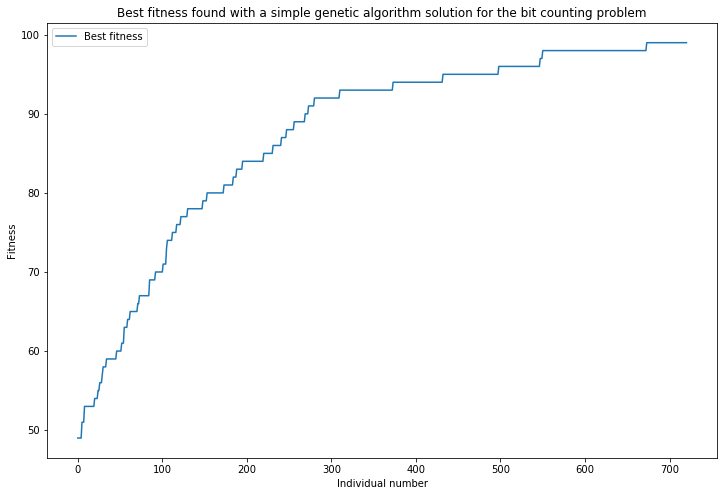

In [130]:
plt.figure(1,figsize=(12,8))
plt.plot(to_plot,label="Best fitness")
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
plt.legend()
plt.show()

###### (b) Now do ten runs. How many times the algorithm finds the optimum?

We haven't found an optimal solution. The best solution is  [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   with fitness:  99 / 100
We haven't found an optimal solution. The best solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   with fitness:  99 / 100
Success!! Optimum solution found with fitness:  100  at ITERATION:  1299
We haven't found an optimal solution. The best solution is  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

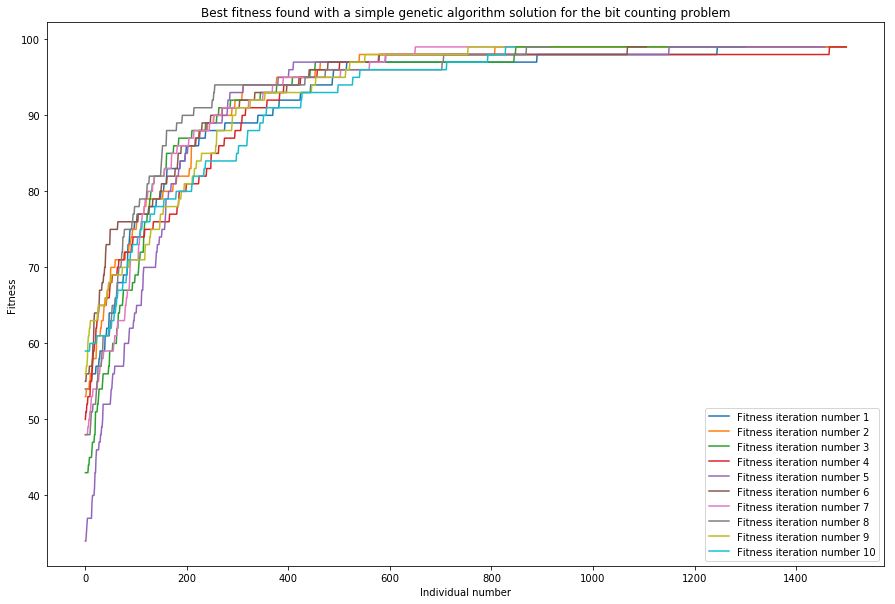

In [131]:
plt.figure(1,figsize=(15,10))
plt.xlabel("Individual number")
plt.ylabel("Fitness")
plt.title("Best fitness found with a simple genetic algorithm solution for the bit counting problem")
for i in range (1,11):
    to_plot = GeneticAlgorithm(counting_ones, 100, 1500)
    legend="Fitness iteration number "+str(i)
    plt.plot(to_plot,label=legend)
plt.legend()
plt.show()

As we see in this 10 runs, tin this case we have 7 opitmal solution 

##### (c) Is there a difference in performance compared to the Monte-Carlo Search algorithm? Justify your answer.

Yes, there is a difference in terms of the performance, due to the nature of the (1+1)-GA. Monte Carlo algorithm is starting from the scratch in every iteration. Although GA uses modifications towards best solution at every iteration. GA uses the best individual found so far as its starting point 


### Question 5

Give a suitable function, terminal set and s-expression for
the following logical formula:
$(x \wedge true) \rightarrow ((x \vee y) \vee (z \longleftrightarrow (x \wedge y)))$

#### -Function set: $\left\{\wedge,\rightarrow,\vee,\longleftrightarrow\right\}$

#### -Terminal set:$\left\{ x, true, y ,z \right\}$

#### -s-expression:$(\:\rightarrow \: (\: \wedge \:x \:true\:)\:(\:\vee\:(\:\vee \:x \:y \:)\:(\:\longleftrightarrow\: z \:( \:\wedge \:x \:y\:)\:)\:)\:)  $ 

### Question 6

http://gplearn.readthedocs.io/en/stable/reference.html#gplearn.genetic.SymbolicRegressor
http://gplearn.readthedocs.io/en/stable/examples.html#example-1-symbolic-regressor

In [133]:
import math
import gplearn
from gplearn import genetic

In [216]:
X=[-1,-0.9,-0.8,-.7,-.6,-.5,-.4,-.3,-.2,-.1,0.0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
Y = [0.0,-.1629,-.2624,-.3129,-.3264,-.3125,-.2784,-.2289,-.1664,-0.0909,0.0,.1111,.2496,.4251,.6496,.9375,1.3056,1.7731,2.3616,3.0951,4.0000]

In [217]:
X=np.reshape(X,(-1,1))
Y=np.reshape(Y,(-1,1))

We make the exponential function to pass as parameter in the function_set, as this is not already built in gplearn

In [218]:
def _protected_exponent(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)

Then we make it into a gplearn compatible function

In [255]:
exp = gplearn.functions.make_function(function=_protected_exponent,name='exp',arity=1)

We define our fitness measure as the sum of absolute errors

In [256]:
def _sae(y, y_pred, w):
    """Calculate the sum absolute error."""
    return np.abs(np.sum(y-y_pred))

We make the fitness function gplearn compatible

In [221]:
sae =gplearn.fitness.make_fitness(_sae, greater_is_better=False)

Now with our parameters, we can build our SymbolicRegressor

In [250]:
est_gp = gplearn.genetic.SymbolicRegressor(population_size=1000,
                           generations=50,function_set=("add","sub","mul","div","log","sin","cos",exp),metric=sae,stopping_criteria=0.00,
                           p_crossover=0.7, p_subtree_mutation=0.0,
                           p_hoist_mutation=0.00, p_point_mutation=0.0,
                           max_samples=1.0, verbose=1,const_range=(0,0),
                           parsimony_coefficient=0.01, random_state=0)
est_gp.fit(X, Y.ravel())

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    15.98 1.85210017338e+12       15  0.0842157176809              N/A     15.92s
   1    12.43    7.15095796898       12   0.015894435143              N/A      2.03m
   2     8.89    6.91570462251       14   0.015894435143              N/A      2.15m
   3     5.07    7.99707920122       12   0.015894435143              N/A      1.95m
   4     5.95    6.31794578548       12   0.015894435143              N/A      1.78m
   5     6.76    13.0017315616        9   0.015894435143              N/A      1.67m
   6      9.0    16.4877458375        9   0.015894435143              N/A      1.62m
   7     9.09    18.2176682274        9   0.015894435143              N/A      1.62m
   8     8.92      23.84773849        9   0.015894435143              N/A 

SymbolicRegressor(const_range=(0, 0),
         function_set=('add', 'sub', 'mul', 'div', 'log', 'sin', 'cos', <gplearn.functions._Function object at 0x0000024727AB2E48>),
         generations=50, init_depth=(2, 6), init_method='half and half',
         max_samples=1.0,
         metric=<gplearn.fitness._Fitness object at 0x0000024727BF1048>,
         n_jobs=1, p_crossover=0.7, p_hoist_mutation=0.0,
         p_point_mutation=0.0, p_point_replace=0.05,
         p_subtree_mutation=0.0, parsimony_coefficient=0.01,
         population_size=1000, random_state=0, stopping_criteria=0.0,
         tournament_size=20, verbose=1, warm_start=False)

We can print the found function:

In [254]:
print (est_gp._program)

exp(mul(log(X0), cos(cos(div(X0, X0)))))


# to finish!!!